In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df2 = pd.read_csv("train.csv")

In [5]:
combined = pd.concat([df, df_test])

In [6]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
#combined = combined.drop(['Cabin', 'Embarked'], axis=1)

In [14]:
#pclass = combined.loc[combined['Fare'].isnull(), 'Pclass'].values[0]

In [16]:
#median_fare = combined.loc[combined['Pclass'] == pclass, 'Fare'].meadian()

In [78]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace = True)

In [79]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [80]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [81]:
df.drop(['SibSp','Parch'], axis = 1, inplace = True)

In [82]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [83]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [84]:
df['Embarked'].mode()[0]

'S'

In [85]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [86]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
dtype: int64

In [87]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [88]:
#find minors and adults, to check if more minors survived
df['Adult'] = 0
df['Adult'][df['Age'] >=18] = 1

C:\Users\HRITIK~1\AppData\Local\Temp/ipykernel_22812/473588002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Adult'][df['Age'] >=18] = 1


In [89]:
df.groupby(['Adult'])['PassengerId'].count()

Adult
0    113
1    778
Name: PassengerId, dtype: int64

In [90]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Adult
0,1,0,3,male,22.0,7.2500,S,2,1
1,2,1,1,female,38.0,71.2833,C,2,1
2,3,1,3,female,26.0,7.9250,S,1,1
3,4,1,1,female,35.0,53.1000,S,2,1
4,5,0,3,male,35.0,8.0500,S,1,1


([<matplotlib.axis.XTick at 0x22afd7d5520>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

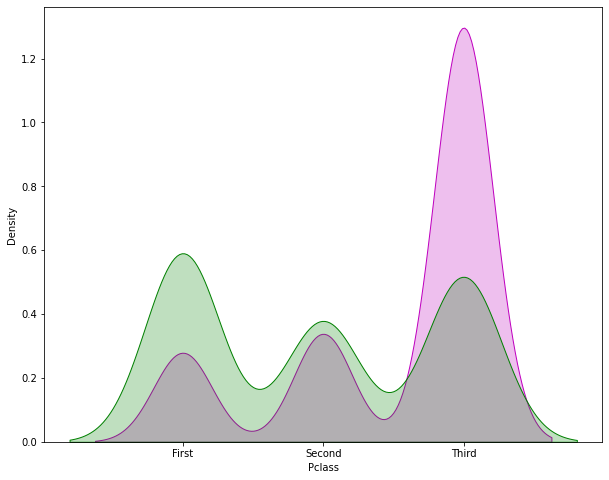

In [91]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df2.loc[(df['Survived'] == 0),'Pclass'],shade=True,color='m',label='Not Survived')
ax=sns.kdeplot(df2.loc[(df['Survived'] == 1),'Pclass'],shade=True,color='g',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df2.Pclass.unique()),labels)

In [92]:
#creating dummies
df = pd.get_dummies(df)
df

,PassengerId,Survived,Pclass,Age,Fare,Family,Adult,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,1,0,1,0,0,1
1,2,1,1,38.0,71.2833,2,1,1,0,1,0,0
2,3,1,3,26.0,7.9250,1,1,1,0,0,0,1
3,4,1,1,35.0,53.1000,2,1,1,0,0,0,1
4,5,0,3,35.0,8.0500,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,1,1,0,1,0,0,1
887,888,1,1,19.0,30.0000,1,1,1,0,0,0,1
888,889,0,3,28.0,23.4500,4,1,1,0,0,0,1
889,890,1,1,26.0,30.0000,1,1,0,1,1,0,0


In [93]:
PredictorColumns = ['Pclass', 'Age', 'Family', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
TargetColumn = 'Survived'

x = df[PredictorColumns].values
y = df[TargetColumn].values

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

# K-Nearest Neighbor

In [95]:
#finding k
import math
math.sqrt(len(y_test))

16.3707055437449

In [60]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1)
print(clf)
KNN = clf.fit(x_train, y_train)
prediction = KNN.predict(x_test)
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test, prediction))

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       174
           1       0.52      0.53      0.52        94

    accuracy                           0.66       268
   macro avg       0.63      0.63      0.63       268
weighted avg       0.66      0.66      0.66       268

[[127  47]
 [ 44  50]]


In [96]:
classifier = KNeighborsClassifier(n_neighbors = 15, p = 2, metric= 'euclidean' )


In [98]:
#Fit model
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [99]:
#Predict the test result
y_pred = classifier.predict(x_test)
y_pred


array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
#Evaluate Model

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[149  25]
 [ 41  53]]


In [109]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))
#takes into account both sides of the balance of false positives

0.6162790697674418


In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))
#how many right and how many wrong

0.6604477611940298


c:\users\hritika kathuria\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family', ylabel='Density'>

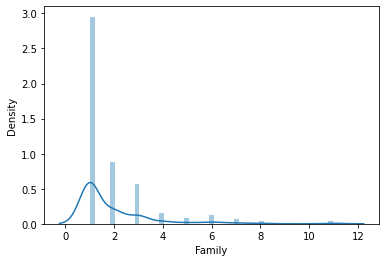

In [65]:
sns.distplot(df['Family'])

In [66]:
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,Family,Adult,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.034212,0.012658,-0.040143,0.024874,-0.042939,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.064910,0.257307,0.016639,-0.122239,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.339898,-0.549500,0.065997,-0.125620,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,0.034212,-0.064910,-0.339898,1.000000,0.096688,-0.245619,0.595143,-0.081163,0.081163,0.030248,-0.031415,-0.006729
Fare,0.012658,0.257307,-0.549500,0.096688,1.000000,0.217138,0.007546,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Family,-0.040143,0.016639,0.065997,-0.245619,0.217138,1.000000,-0.380192,0.200988,-0.200988,-0.046215,-0.058592,0.077359
Adult,0.024874,-0.122239,-0.125620,0.595143,0.007546,-0.380192,1.000000,-0.107150,0.107150,-0.023225,0.033194,-0.000543
Sex_female,-0.042939,0.543351,-0.131900,-0.081163,0.182333,0.200988,-0.107150,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,0.042939,-0.543351,0.131900,0.081163,-0.182333,-0.200988,0.107150,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,-0.001205,0.168240,-0.243292,0.030248,0.269335,-0.046215,-0.023225,0.082853,-0.082853,1.000000,-0.148258,-0.782742


<AxesSubplot:>

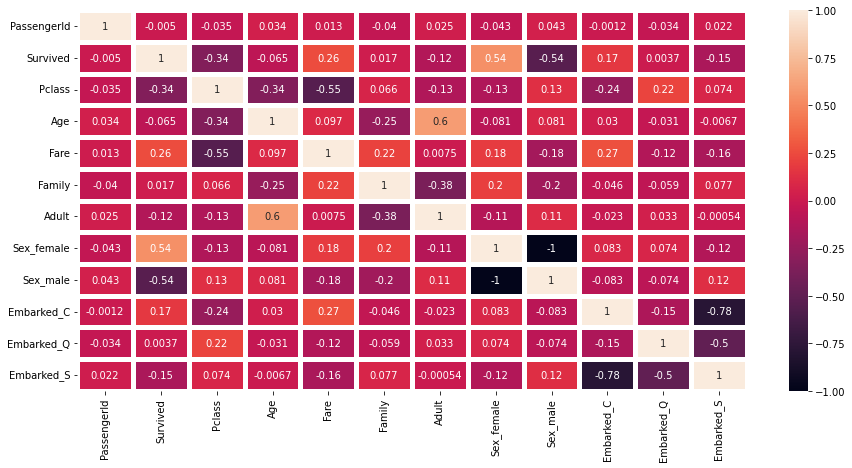

In [67]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),linewidths=5, annot=True)

We see high negative correlation between survived and males.

Pclass has negative correlation with survived. 

Fare has negative correlation with Pclass.


# Plotting the ROC curve

In [68]:
from sklearn.metrics import roc_curve, auc

In [70]:
false_positive , true_positive, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(false_positive, true_positive)

Text(0.5, 0, 'False Positive Rate')

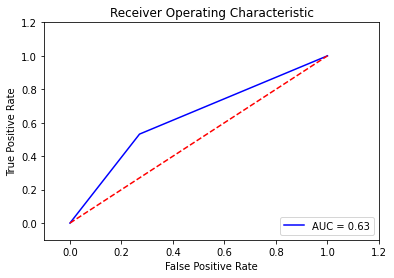

In [71]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive, true_positive, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')